# Polynomials over GF($2^m$) - Addition

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `GF2PolyAdd`
In place quantum-quantum addition of two polynomials defined over GF($2^m$).

The bloq implements in place addition of quantum registers $|f(x)\rangle$ and $|g(x)\rangle$
storing coefficients of two degree-n polynomials defined over GF($2^m$).
Addition in GF($2^m$) simply reduces to a component wise XOR, which can be implemented via
CNOT gates.

$$
    |f(x)\rangle |g(x)\rangle  \rightarrow |f(x)\rangle |f(x) + g(x)\rangle
$$

#### Parameters
 - `qgf_poly`: An instance of `QGFPoly` type that defines the data type for quantum register $|f(x)\rangle$ storing coefficients of a degree-n polynomial defined over GF($2^m$). 

#### Registers
 - `f_x`: THRU register that stores coefficients of first polynomial defined over $GF(2^m)$.
 - `g_x`: THRU register that stores coefficients of second polynomial defined over $GF(2^m)$.


In [2]:
from qualtran.bloqs.gf_poly_arithmetic import GF2PolyAdd

### Example Instances

In [3]:
from qualtran import QGF, QGFPoly

qgf_poly = QGFPoly(4, QGF(2, 3))
gf2_poly_4_8_add = GF2PolyAdd(qgf_poly)

In [4]:
import sympy

from qualtran import QGF, QGFPoly

n, m = sympy.symbols('n, m', positive=True, integers=True)
qgf_poly = QGFPoly(n, QGF(2, m))
gf2_poly_add_symbolic = GF2PolyAdd(qgf_poly)

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([gf2_poly_4_8_add, gf2_poly_add_symbolic],
           ['`gf2_poly_4_8_add`', '`gf2_poly_add_symbolic`'])

### Call Graph

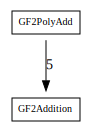

#### Counts totals:
 - `GF2Addition`: 5

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
gf2_poly_4_8_add_g, gf2_poly_4_8_add_sigma = gf2_poly_4_8_add.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(gf2_poly_4_8_add_g)
show_counts_sigma(gf2_poly_4_8_add_sigma)